### Importações

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Carregando arquivo csv

In [50]:
df = pd.read_csv('openco_etapa1_dataset.csv', sep=';')
df.head()
df_backup = df

### Tratando os dados

In [51]:
df['valor_contrato'] = df['valor_contrato'].str.replace(',', '.', regex=True).astype(float)
df['faturamento_informado'] = df['faturamento_informado'].str.replace(',', '.', regex=True).astype(float)
df['taxa'] = df['taxa'].str.replace(',', '.', regex=True).astype(float)
df['valor_contrato_mais_juros'] = df['valor_contrato_mais_juros'].str.replace(',', '.', regex=True).astype(float)
df['valor_em_aberto'] = df['valor_em_aberto'].str.replace(',', '.', regex=True).astype(float)
df['prazo'] = df['prazo'].str.replace(',', '.', regex=True).astype(float)

## Pergunta 1:
Traga o ticket, taxa e prazo médios desta amostra fictícia.
Conceito de Bad:
Definimos determinado empréstimo como Bad quando este ultrapassa 180 dias de atraso.
Dessa forma, Bad = 1 define um mal pagador; Bad = 0 define um bom pagador.

**Ticket médio** ( valor médio dos contratos )

In [52]:
media = df['valor_contrato'].mean()


**Taxa Média Ponderada**

In [53]:
taxa_media_ponderada = (df['valor_contrato'] * df['taxa']).sum() / df['valor_contrato'].sum().mean()


**Prazo Médio Ponderado**

In [54]:
prazo_medio_ponderado = (df['valor_contrato'] * df['prazo']).sum() / df['valor_contrato'].sum().mean()

## Resposta 1:



O Valor médio dos contratos é : 24169.087385454546

Média ponderada  4.454069269633344

Prazo medio  11.702131571768259

## Pergunta 2:
 Queremos saber. Quais as características típicas de um bom pagador? E as de um mal pagador?



Criando coluna do tipo do pagador



In [55]:
df['bad'] = [1 if x > 180 else 0 for x in df['atraso_corrente']]


### Separando os tipos de pagadores

In [56]:
grupo_bom = df[df['bad'] == 0]
grupo_mau = df[df['bad'] == 1]


### Analise de correlação com a variável BAD

In [ ]:

def get_correlated_variables(df, variable):
    new_df = df.copy()

    # Exclua as colunas especificadas
    new_df = new_df.drop(['id'], axis=1)
    correlation_matrix = new_df.corr()
    # Filtre a matriz de correlação para encontrar as variáveis que têm correlações positivas com a variável bad
    positive_correlations = correlation_matrix[variable].where(lambda x: x > 0).dropna()

    # Retorne uma lista com as variáveis que foram filtradas
    return positive_correlations.index.tolist()

get_correlated_variables(df, 'bad')

Ao identificar as variáveis com maior correlação com o risco de inadimplência, torna-se possível realizar uma análise mais objetiva. Nesse caso, as variáveis que parecem ter maior influência na capacidade do cliente de ser um bom ou mau pagador são: **faturamento_informado, divida_total_pj, taxa, atraso_corrente, prazo e valor_em_aberto**.


### Análise de Balanceamento de Amostra

Decidi realizar o balanceamento de amostra nesta análise devido à disparidade nos dados entre os "maus pagadores" e os "bons pagadores". Essa estratégia permite equilibrar a representatividade de ambas as categorias, garantindo uma análise mais precisa e imparcial dos dados.


In [61]:

tamanho_desejado = len(grupo_bom)

maus_pagadores_reamostrado = grupo_mau.sample(n=tamanho_desejado, replace=True, random_state=42)

amostra_balanceada = pd.concat([grupo_bom, maus_pagadores_reamostrado])

grupo_bom = amostra_balanceada[amostra_balanceada['bad'] == 0]
grupo_mau = amostra_balanceada[amostra_balanceada['bad'] == 1]


### Criando uma função que exibe em gráfico como está cada característica dos bons e maus pagadores em relação a cada campo do conjunto de dados.

In [60]:
def comparar_estatisticas_e_plot(grupo1, grupo2, coluna):
    estatisticas_grupo1 = grupo1[coluna].describe()
    estatisticas_grupo2 = grupo2[coluna].describe()

    estatisticas_labels = estatisticas_grupo1.index

    valores_grupo1 = estatisticas_grupo1.values
    valores_grupo2 = estatisticas_grupo2.values

    n_estatisticas = len(estatisticas_labels)

    largura_barra = 0.35

    indices = range(n_estatisticas)

    plt.bar(indices, valores_grupo1, largura_barra, label='Bom pagador', color='blue')
    plt.bar([i + largura_barra for i in indices], valores_grupo2, largura_barra, label='Mau pagador', color='red')

    plt.xticks([i + largura_barra / 2 for i in indices], estatisticas_labels)

    plt.xlabel('Estatísticas Descritivas')
    plt.ylabel('Valores')
    plt.title(f'Comparação das Estatísticas Descritivas para {coluna}')

    plt.legend()

    plt.show()

    print('**Grupo Bom pagador**')
    print(f'Média: {estatisticas_grupo1["mean"]}')
    print(f'Desvio Padrão: {estatisticas_grupo1["std"]}')
    print(f'Mínimo: {estatisticas_grupo1["min"]}')
    print(f'25º Percentil: {estatisticas_grupo1["25%"]}')
    print(f'50º Percentil (Mediana): {estatisticas_grupo1["50%"]}')
    print(f'75º Percentil: {estatisticas_grupo1["75%"]}')
    print(f'Máximo: {estatisticas_grupo1["max"]}')
    print('\n')
    print('**Grupo Mau pagador**')
    print(f'Média: {estatisticas_grupo2["mean"]}')
    print(f'Desvio Padrão: {estatisticas_grupo2["std"]}')
    print(f'Mínimo: {estatisticas_grupo2["min"]}')
    print(f'25º Percentil: {estatisticas_grupo2["25%"]}')
    print(f'50º Percentil (Mediana): {estatisticas_grupo2["50%"]}')
    print(f'75º Percentil: {estatisticas_grupo2["75%"]}')
    print(f'Máximo: {estatisticas_grupo2["max"]}')



### Caracteristica **divida_total_pj**


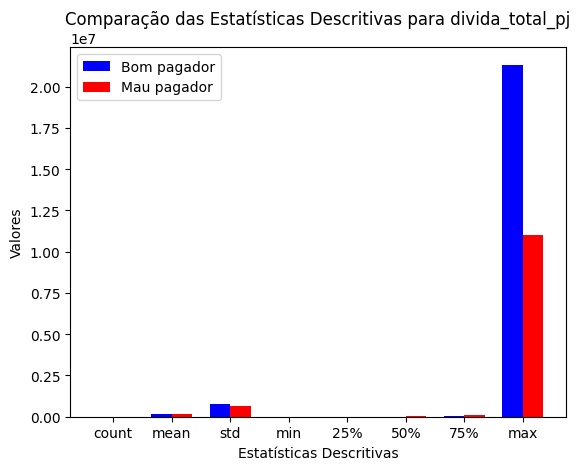

**Grupo Bom pagador**
Média: 144255.1474719101
Desvio Padrão: 778092.4298674931
Mínimo: 0.0
25º Percentil: 203.5
50º Percentil (Mediana): 13000.0
75º Percentil: 72000.0
Máximo: 21330000.0


**Grupo Mau pagador**
Média: 162544.6005567154
Desvio Padrão: 678484.1496731044
Mínimo: 0.0
25º Percentil: 0.0
50º Percentil (Mediana): 14000.0
75º Percentil: 96000.0
Máximo: 11022000.0


In [62]:
comparar_estatisticas_e_plot(grupo_bom, grupo_mau, "divida_total_pj")


A característica "divida_total_pj" pode ser usada para distinguir os bons pagadores dos maus pagadores. No grupo dos bons pagadores, a média da dívida total é de aproximadamente 144.255,15. A faixa de valores das dívidas nesse grupo varia de 0 a 21.330.000,00, e os percentis indicam que a maioria das dívidas está concentrada entre 203,50 e 72.000,00.

Por outro lado, no grupo dos maus pagadores, a média da dívida total é de aproximadamente 154.723,21. A faixa de valores das dívidas nesse grupo varia de 0 a 11.022.000,00, e os percentis indicam que a maioria das dívidas está concentrada entre 0,00 e 95.000,00.

Esses dados sugerem que, em média, os bons pagadores têm a portentagem de 6,8% menor do que os maus pagadores. Além disso, observamos que o desvio padrão dos bons pagadores é maior que a média deles, enquanto nos maus pagadores ocorre o contrário, o desvio padrão é menor do que a média. Isso pode indicar a existência de perfis mais distintos entre bons e maus pagadores, ou a presença de outliers nesta amostra.


### Caracteristica **faturamento_informado**




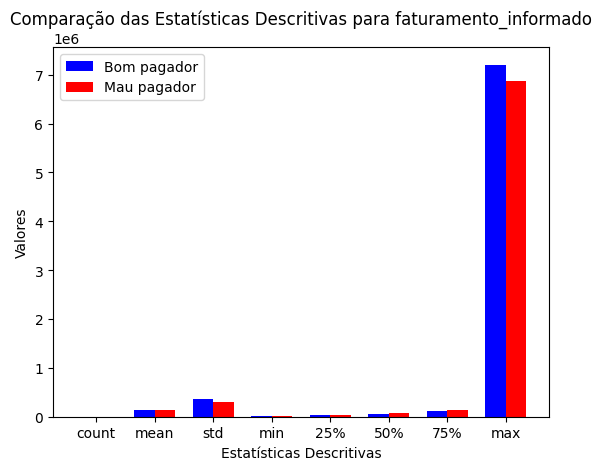

**Grupo Bom pagador**
Média: 137708.52155898875
Desvio Padrão: 370848.04820932576
Mínimo: 6000.0
25º Percentil: 30000.0
50º Percentil (Mediana): 57000.0
75º Percentil: 120000.0
Máximo: 7203600.0


**Grupo Mau pagador**
Média: 143924.35643702158
Desvio Padrão: 302200.7343738029
Mínimo: 8000.0
25º Percentil: 30000.0
50º Percentil (Mediana): 66700.0
75º Percentil: 136000.0
Máximo: 6877950.0


In [63]:
comparar_estatisticas_e_plot(grupo_bom, grupo_mau, 'faturamento_informado')


A característica "faturamento_informado" pode ser usada para distinguir os bons pagadores dos maus pagadores. No grupo dos bons pagadores, a média da dívida total é de aproximadamente 137.708,52. A faixa de valores das dívidas nesse grupo varia de 6000.0 a 7.203.600,00, e os percentis indicam que a maioria das dívidas está concentrada entre 30.000,00 e 120.000,00.

No grupo dos maus pagadores, a média da dívida total é de aproximadamente 158.392,43. A faixa de valores das dívidas nesse grupo varia de 8.000,00 a 11.000.000,00, e os percentis indicam que a maioria das dívidas está concentrada entre 30.000,00 e 130.000,00.

Portanto, a média do faturamento dos bons pagadores é aproximadamente 13.0% menor do que a média dos maus pagadores e o desvio padrão dos maus pagadores é muito superior à média deles. O mesmo ocorre com os bons pagadores, mas o desvio padrão dos maus pagadores tem uma superioridade muito maior.


### Caracteristica score

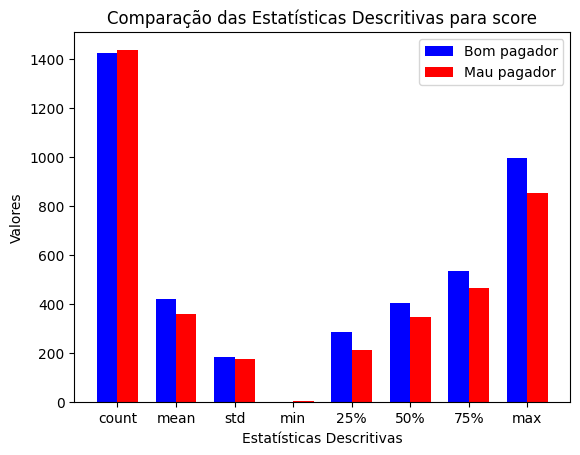

**Grupo Bom pagador**
Média: 418.7633426966292
Desvio Padrão: 182.80757492345543
Mínimo: 0.0
25º Percentil: 286.0
50º Percentil (Mediana): 403.5
75º Percentil: 534.0
Máximo: 997.0


**Grupo Mau pagador**
Média: 356.89700765483644
Desvio Padrão: 174.25535315694898
Mínimo: 4.0
25º Percentil: 213.0
50º Percentil (Mediana): 345.0
75º Percentil: 463.0
Máximo: 853.0


In [64]:
comparar_estatisticas_e_plot(grupo_bom, grupo_mau, 'score')


A característica "score" pode ser usada para distinguir os bons pagadores dos maus pagadores. No grupo dos bons pagadores, a média do score é de aproximadamente 418.76. A faixa de valores de score varia de 0.0 a 997.0.

No grupo dos maus pagadores, a média do score é de aproximadamente 358.17. A faixa do score nesse grupo varia de 4.0 a 853.0, e os percentis indicam que a maioria das dívidas está concentrada entre 220.0 e 463.0.

Portanto, a média do score dos maus pagadores é aproximadamente 14.5% menor do que a média dos bons pagadores.

### Caracteristica taxa

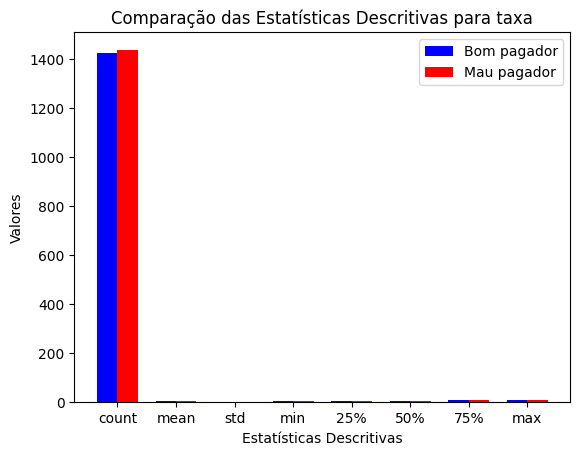

**Grupo Bom pagador**
Média: 4.775575491573034
Desvio Padrão: 0.6258768461268384
Mínimo: 3.0975
25º Percentil: 4.347
50º Percentil (Mediana): 4.788
75º Percentil: 5.145
Máximo: 7.056


**Grupo Mau pagador**
Média: 4.889456158663883
Desvio Padrão: 0.6933736581107156
Mínimo: 3.3915
25º Percentil: 4.389
50º Percentil (Mediana): 4.893
75º Percentil: 5.2815
Máximo: 6.9405


In [65]:
comparar_estatisticas_e_plot(grupo_bom, grupo_mau, 'taxa')

Ao analisar o grupo "Bom pagador", observamos uma taxa média ligeiramente mais baixa de 4.78, enquanto o grupo "Mau pagador" apresenta uma taxa média um pouco mais alta de 4.89. É importante ressaltar que foi necessário realizar um balanceamento dos dados para tornar essa análise mais equilibrada. A diferença entre a taxa do grupo "Mau pagador" e do grupo "Bom pagador" é pequena, com o mau pagador apresentando uma taxa apenas 2.25% maior do que o bom pagador.


### Caracteristica atraso_corrente

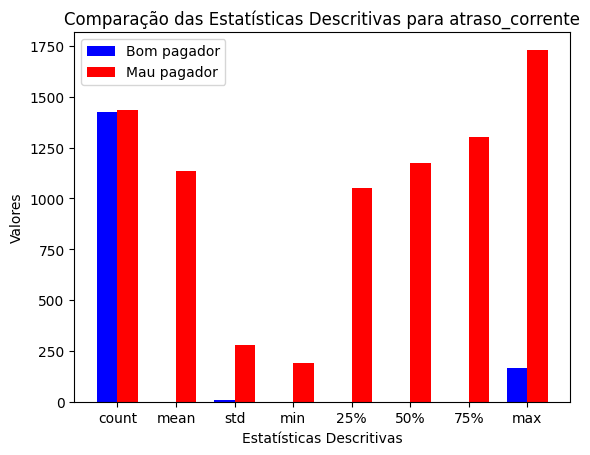

**Grupo Bom pagador**
Média: 0.9922752808988764
Desvio Padrão: 9.81196778918773
Mínimo: 0.0
25º Percentil: 0.0
50º Percentil (Mediana): 0.0
75º Percentil: 0.0
Máximo: 164.0


**Grupo Mau pagador**
Média: 1136.2707028531663
Desvio Padrão: 277.2048402636433
Mínimo: 189.0
25º Percentil: 1053.0
50º Percentil (Mediana): 1176.0
75º Percentil: 1305.0
Máximo: 1732.0


In [66]:
comparar_estatisticas_e_plot(grupo_bom, grupo_mau, 'atraso_corrente')

Ao analisarmos a taxa de atraso, podemos observar que um mau pagador tem uma média de atraso aproximadamente 99.9% maior do que a de um bom pagador. No entanto, o desvio padrão dos bons pagadores em relação à sua própria média é muito maior do que o desvio padrão dos maus pagadores em relação à sua própria média. Logo, é notório pensar que existem circunstâncias distintas entre bons e maus pagadores.


### Caracteristica prazo

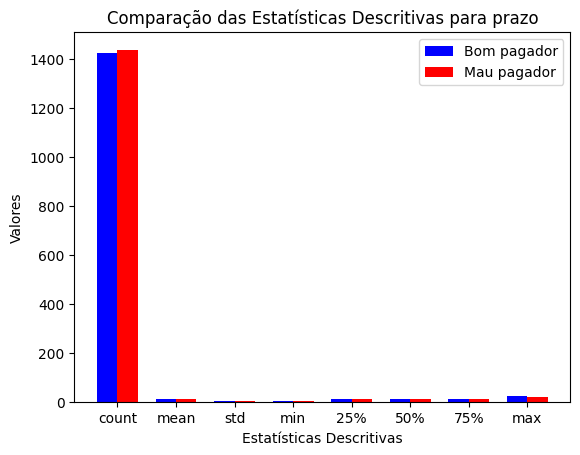

**Grupo Bom pagador**
Média: 11.287499999999998
Desvio Padrão: 3.051045867477784
Mínimo: 3.15
25º Percentil: 10.5
50º Percentil (Mediana): 12.6
75º Percentil: 12.6
Máximo: 25.2


**Grupo Mau pagador**
Média: 11.214613778705635
Desvio Padrão: 2.89422428288048
Mínimo: 3.15
25º Percentil: 11.55
50º Percentil (Mediana): 12.6
75º Percentil: 12.6
Máximo: 18.9


In [67]:
comparar_estatisticas_e_plot(grupo_bom, grupo_mau, 'prazo')

A análise sugere que, em média, os prazos para bons e maus pagadores são muito semelhantes, com diferenças mínimas na média e no desvio padrão. No entanto, o grupo de bons pagadores tem um prazo máximo um pouco mais alto do que o grupo de maus pagadores. Isso pode indicar que, em geral, os prazos para bons pagadores tendem a ser ligeiramente mais longos, mas as diferenças são pequenas.

### Caracteristicas valor_em_aberto

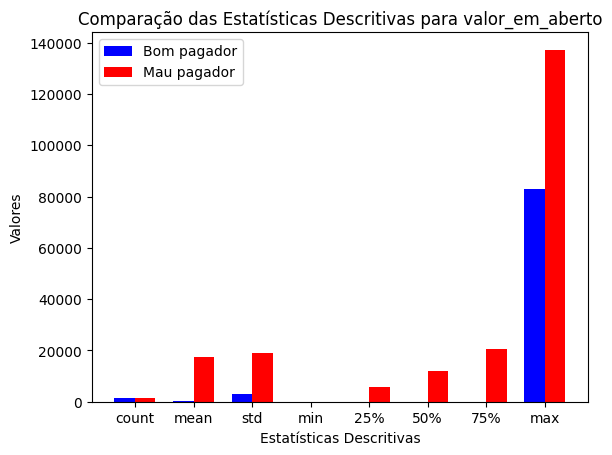

**Grupo Bom pagador**
Média: 329.72315308988766
Desvio Padrão: 3094.8058501308565
Mínimo: 0.0
25º Percentil: 0.0
50º Percentil (Mediana): 0.0
75º Percentil: 0.0
Máximo: 82816.3


**Grupo Mau pagador**
Média: 17396.258058455114
Desvio Padrão: 18968.38471118214
Mínimo: 0.0
25º Percentil: 5634.14
50º Percentil (Mediana): 11941.64
75º Percentil: 20432.4
Máximo: 137223.36


In [68]:
comparar_estatisticas_e_plot(grupo_bom, grupo_mau, 'valor_em_aberto')

Em geral, os maus pagadores têm um valor em aberto significativamente maior do que os bons pagadores. A média, o desvio padrão, o 25º, 50º e 75º percentil e o máximo do valor em aberto são todos maiores para os maus pagadores.Isso significa que os maus pagadores têm, em média, mais dinheiro em aberto do que os bons pagadores.
Há uma maior variação no valor em aberto entre os próprios maus pagadores do que na comparação com os bons.

## Resposta 2:


Podemos identificar as características típicas de um bom pagador e de um mau pagador:

Bons pagadores:

- Possuem uma dívida total menor.
- Apresentam um faturamento informado menor.
- Têm um score maior.
- Possuem taxas menores.
- Apresentam um atraso corrente menor.
- Têm um prazo maior.
- Possuem um valor em aberto menor.

Maus pagadores:

- Possuem uma dívida total maior.
- Apresentam um faturamento informado maior.
- Têm um score menor.
- Possuem taxas maiores.
- Apresentam um atraso corrente maior.
- Têm um prazo menor.
- Possuem um valor em aberto maior.

### Criando Loss

In [69]:
df = amostra_balanceada.copy()
df['loss'] = df.apply(lambda row: row['valor_em_aberto'] / row['valor_contrato_mais_juros'] if row['bad'] == 1 else -1, axis=1)

## Pergunta 2.1:
Quando olhamos do ponto de vista de Loss, será que as características dos bons e mal
pagadores que vimos olhando a bad continuam valendo?

Para responder esse pergunta é preciso fazer uma analise exploratório novamente olhando por outro angulo.


Seguindo o mesmo padrão da outra análise, decidi separar os pagadores em dois grupos: empresas com loss acima da mediana, que serão consideradas empresas má pagadoras, e empresas com loss abaixo da mediana, que serão consideradas juntamente com as empresas que não possuem loss.

Ao seguir esse raciocínio, é possível observar que foram formados dois grupos quase homogêneos entre os antigos maus pagadores, que agora são bons pagadores com loss, e maus pagadores com loss acima da mediana. Para manter uma análise padronizada, será necessário balancear novamente a amostra, de modo que a quantidade de maus pagadores, que caiu pela metade, volte a ter a mesma quantidade de observações que bons pagadores, que agora se fundiram ao grupo de pagadores com loss abaixo da mediana.


In [70]:
"""Pegando a Mediana para usar como meta de corte quem é muito mal pagador e quem é menos mau pagador"""

loss_maus_pagadores = df[df['bad'] == 1]['loss'].describe()
corte = loss_maus_pagadores['50%']

maus_pagadores = df[df['bad'] == 1]
bons_pagadores =  df[df['bad'] == 0]

bons_pagadores_loss_minus1 = df[df['loss'] == -1]

maus_pagadores_loss_acima_corte = maus_pagadores[maus_pagadores['loss'] > corte]

bons_pagadores_loss = maus_pagadores[maus_pagadores['loss'] <= corte]

new_bons_pagadores = pd.concat([bons_pagadores_loss, bons_pagadores])

Rebalanceando a amostra de maus pagadores

In [71]:
tamanho_desejado = len(new_bons_pagadores)

maus_pagadores_reamostrado = maus_pagadores_loss_acima_corte.sample(n=tamanho_desejado, replace=True, random_state=42)

maus_pagadores = maus_pagadores_reamostrado
bons_pagadores = new_bons_pagadores

### Analise de correlação com a variável Loss
Aqui estão as variáveis que têm correlação com a 'loss', para que seja possível realizar uma análise exploratória mais objetiva.


In [ ]:
get_correlated_variables(df, 'loss')

As variaveis retornadas são: **faturamento_informado, taxa, atraso_corrente,valor_em_aberto, bad**.  

A análise de correlação é uma ferramenta útil para a análise de dados. Durante a observação da análise descritiva, foi identificado que seria interessante utilizar as variáveis "score" e "prazo". Essa escolha visa manter um padrão consistente na análise.

### Caracteristica **divida_total_pj**

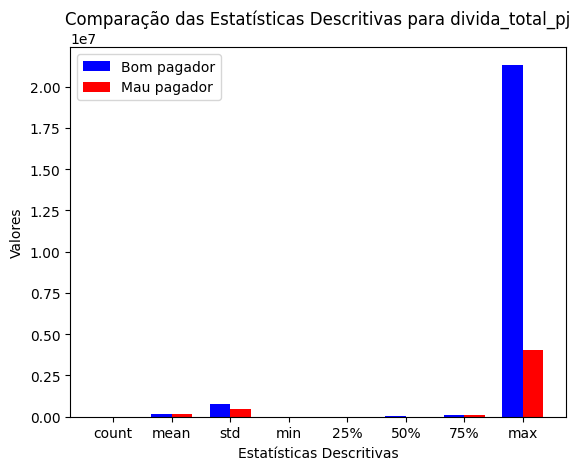

**Grupo Bom pagador**
Média: 155043.1711627907
Desvio Padrão: 785787.1780701901
Mínimo: 0.0
25º Percentil: 376.0
50º Percentil (Mediana): 15000.0
75º Percentil: 84000.0
Máximo: 21330000.0


**Grupo Mau pagador**
Média: 137356.51363846508
Desvio Padrão: 484579.31203422387
Mínimo: 0.0
25º Percentil: 0.0
50º Percentil (Mediana): 11000.0
75º Percentil: 96000.0
Máximo: 4036000.0


In [73]:

comparar_estatisticas_e_plot(bons_pagadores, maus_pagadores, "divida_total_pj")


Ao analisar as características dos bons pagadores em comparação com os maus pagadores em relação à dívida total, foi constatado que a média dos bons pagadores é menor do que a dos maus pagadores. Além disso, ao observar o desvio padrão, verificou-se que ele continua maior que a média para os bons pagadores e menor que a média para os maus pagadores.


### Caracteristica **faturamento informado**

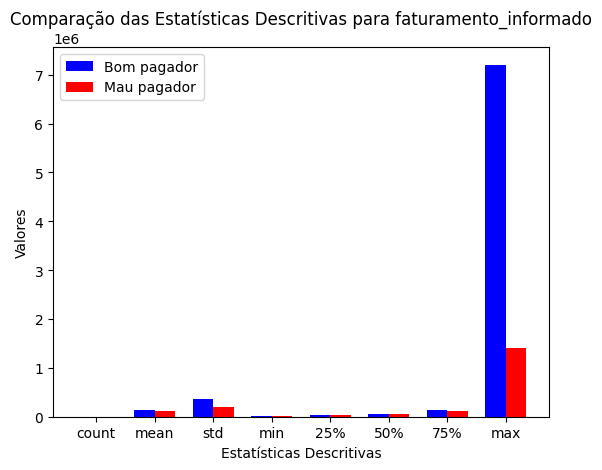

**Grupo Bom pagador**
Média: 144644.0241395349
Desvio Padrão: 367815.03509873676
Mínimo: 6000.0
25º Percentil: 30000.0
50º Percentil (Mediana): 60000.0
75º Percentil: 136000.0
Máximo: 7203600.0


**Grupo Mau pagador**
Média: 121480.3046694406
Desvio Padrão: 208958.62384788203
Mínimo: 8000.0
25º Percentil: 30000.0
50º Percentil (Mediana): 60000.0
75º Percentil: 110000.0
Máximo: 1400000.0


In [74]:
comparar_estatisticas_e_plot(bons_pagadores, maus_pagadores, 'faturamento_informado')

Ao analisar o faturamento informado, agora nota-se que houve uma mudança nas características dos bons pagadores. Os bons pagadores possuem um valor informado maior, enquanto os maus pagadores possuem um valor menor.

### Caracteristicas **score**

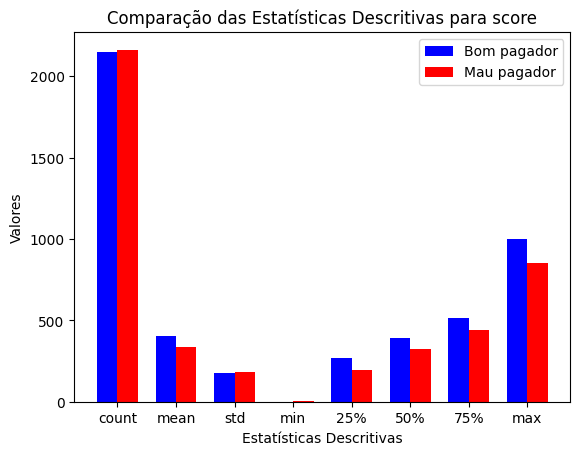

**Grupo Bom pagador**
Média: 403.32
Desvio Padrão: 178.22556154045998
Mínimo: 0.0
25º Percentil: 268.25
50º Percentil (Mediana): 391.0
75º Percentil: 515.0
Máximo: 997.0


**Grupo Mau pagador**
Média: 335.6102635228849
Desvio Padrão: 179.97202790692626
Mínimo: 4.0
25º Percentil: 194.0
50º Percentil (Mediana): 323.0
75º Percentil: 439.0
Máximo: 853.0


In [75]:
comparar_estatisticas_e_plot(bons_pagadores, maus_pagadores, 'score')

Ao analisar o score, agora nota-se que houve uma mudança nas características dos bons pagadores. Agora, sua mediana é inferior à dos maus pagadores, o que mostra uma concentração maior de empresas com score mais baixo nesse grupo. Além disso, a característica de os bons pagadores terem uma média maior se manteve.

### Caracteristicas das taxas

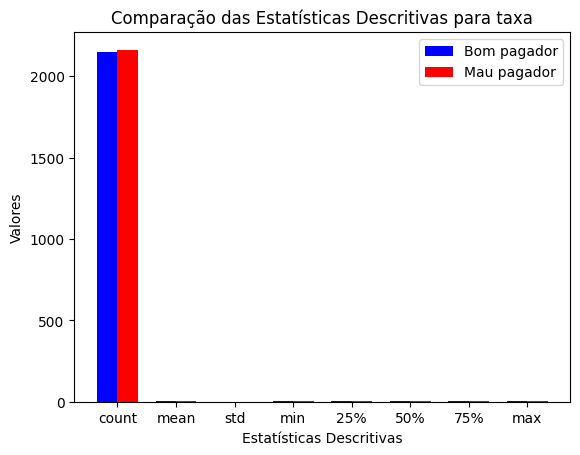

**Grupo Bom pagador**
Média: 4.795721162790699
Desvio Padrão: 0.6352673294331195
Mínimo: 3.0975
25º Percentil: 4.3575
50º Percentil (Mediana): 4.7985
75º Percentil: 5.166
Máximo: 7.056


**Grupo Mau pagador**
Média: 4.979257281553398
Desvio Padrão: 0.7300172582238896
Mínimo: 3.3915
25º Percentil: 4.4835
50º Percentil (Mediana): 4.9875
75º Percentil: 5.4285
Máximo: 6.9405


In [76]:
comparar_estatisticas_e_plot(bons_pagadores, maus_pagadores, 'taxa')

Pode-se analisar que essa característica de taxa de maus pagadores tem uma taxa ligeiramente superior à taxa de bons pagadores.

### Caracteristicas Atraso_corrente


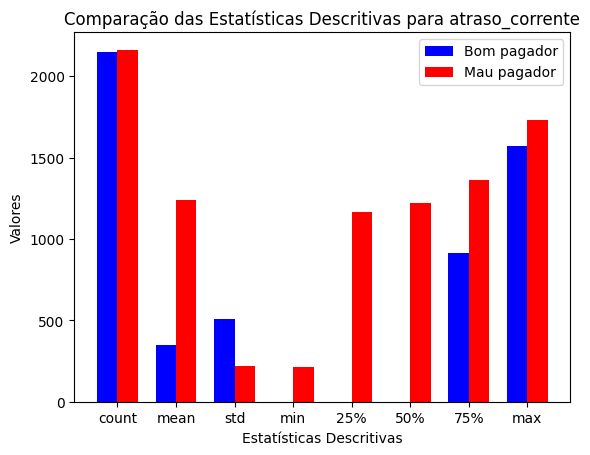

**Grupo Bom pagador**
Média: 345.673023255814
Desvio Padrão: 511.03708054287546
Mínimo: 0.0
25º Percentil: 0.0
50º Percentil (Mediana): 0.0
75º Percentil: 911.25
Máximo: 1571.0


**Grupo Mau pagador**
Média: 1242.1618122977347
Desvio Padrão: 219.60450255390927
Mínimo: 216.0
25º Percentil: 1166.5
50º Percentil (Mediana): 1221.0
75º Percentil: 1361.0
Máximo: 1732.0


In [77]:
comparar_estatisticas_e_plot(bons_pagadores, maus_pagadores, 'atraso_corrente')

Ao analisar as características da média de atraso, observa-se que os maus pagadores geralmente atrasam mais.

### Caracteristicas prazo

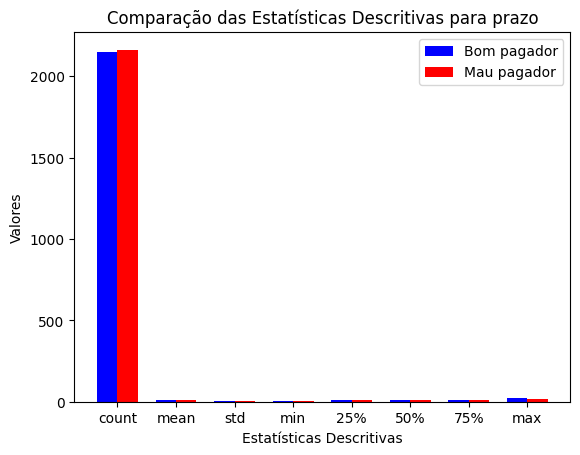

**Grupo Bom pagador**
Média: 11.324860465116277
Desvio Padrão: 2.9810689888848887
Mínimo: 3.15
25º Percentil: 10.5
50º Percentil (Mediana): 12.6
75º Percentil: 12.6
Máximo: 25.2


**Grupo Mau pagador**
Média: 11.11747572815534
Desvio Padrão: 2.841018714234847
Mínimo: 3.15
25º Percentil: 11.55
50º Percentil (Mediana): 12.6
75º Percentil: 12.6
Máximo: 18.9


In [78]:
comparar_estatisticas_e_plot(bons_pagadores, maus_pagadores, 'prazo')

Analisando as características dos bons e maus pagadores em relação ao prazo, nota-se que agora os bons pagadores têm um prazo maior e mantêm a característica de terem um prazo superior aos maus pagadores.

### Caracteristicas valor_em_aberto

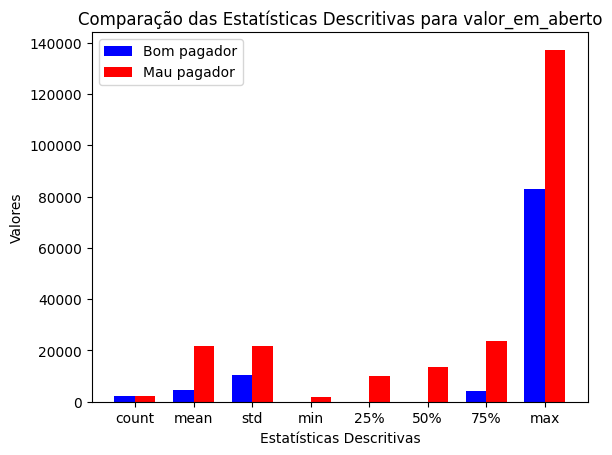

**Grupo Bom pagador**
Média: 4644.811786046513
Desvio Padrão: 10597.41667397329
Mínimo: 0.0
25º Percentil: 0.0
50º Percentil (Mediana): 0.0
75º Percentil: 4272.09
Máximo: 82816.3


**Grupo Mau pagador**
Média: 21582.89806749884
Desvio Padrão: 21607.837569821422
Mínimo: 1961.15
25º Percentil: 9869.385
50º Percentil (Mediana): 13668.96
75º Percentil: 23697.905
Máximo: 137223.36


In [79]:
comparar_estatisticas_e_plot(bons_pagadores, maus_pagadores, 'valor_em_aberto')

Pode-se observar que as características se mantiveram iguais: a média dos maus pagadores é maior do que a dos bons, assim como o valor máximo também é maior.

## Resposta 2.1:



Sim, ao analisar as características dos bons e maus pagadores do ponto de vista de Loss, é evidente que ocorreram mudanças nas características. Anteriormente, a média do faturamento informado dos bons pagadores tornou-se maior em relação aos maus pagadores. Além disso, a mediana do score dos bons pagadores agora é inferior à dos maus pagadores. Em relação às taxas, os bons pagadores apresentam uma média maior do que os maus pagadores. No atraso corrente, embora a média dos bons pagadores seja menor, a mediana passou a ser maior do que antes. Por fim, no valor em aberto, a média dos maus pagadores continua sendo maior do que a dos bons pagadores. Portanto, é possível observar que algumas características se mantiveram, enquanto outras sofreram alterações.

E as caracteristicastípicas de um bom pagador e de um mau pagador seriam essas agora:

Bons pagadores:

- Possuem uma dívida total menor.
- Apresentam um faturamento informado maior. ( Anteriormente menor )
- Têm um score menor. ( Anteriormente score maior )
- Possuem taxas menores.
- Apresentam um atraso corrente menor, embora não tão baixo como antes.
- Têm um prazo maior.
- Possuem um valor em aberto menor.

Maus pagadores:

- Possuem uma dívida total maior.
- Apresentam um faturamento informado menor. ( Anteriomente maior )
- Têm um score maior. ( Anteriormente menor )
- Possuem taxas maiores.
- Apresentam um atraso corrente maior.
- Têm um prazo menor.
- Possuem um valor em aberto maior.

## Pergunta 2.2

Crie na base um score próprio, ou seja, uma categorização dos clientes que seja baseada nas
características que você viu que melhor separa bons e mal pagadores. Em seguida, verifique se
a bad e loss estão de acordo com o que você esperava.


Analisando quais são as correlações e os valores para que possa criar um peso para cada campo.

<ipython-input-81-ff6699e00926>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = df_score.corr()


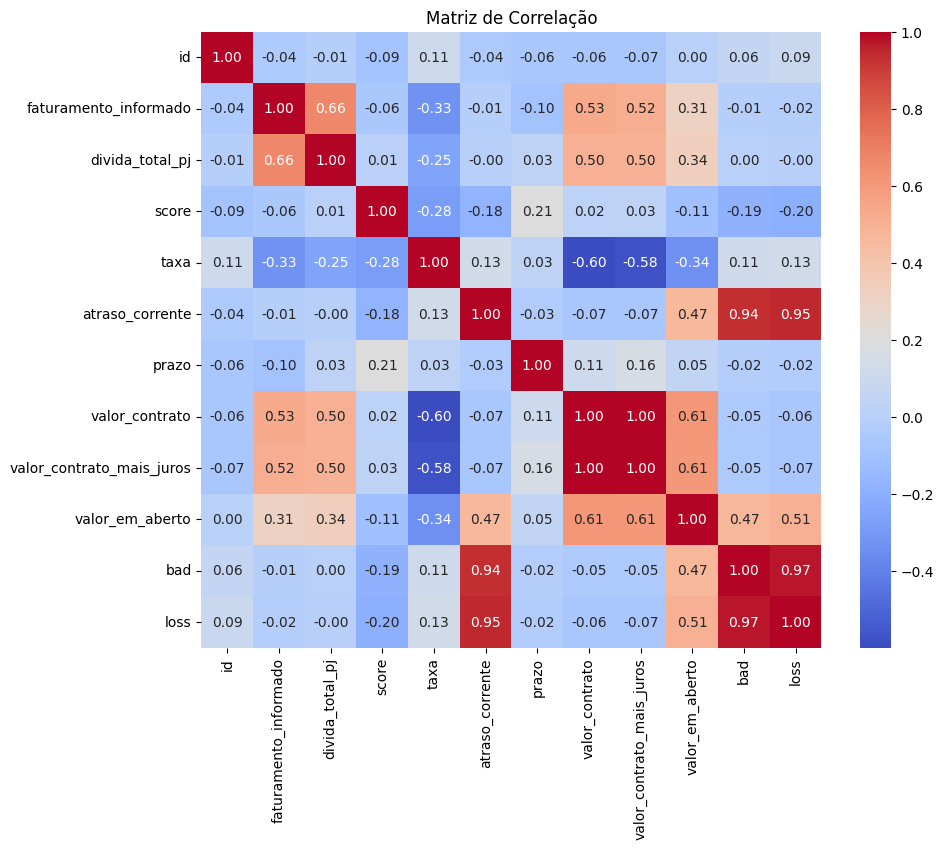

In [81]:
df_score = pd.concat([maus_pagadores_reamostrado, new_bons_pagadores])

matriz = df_score.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()





Para criar o score, calculei a média da correlação de todas as variáveis da matriz de correlação. Em seguida, atribuí a média calculada como peso para cada variável. Para calcular o novo score, somei o produto de cada campo com o peso médio da correlação. Como os dados ficaram muito altos, normalizei-os para que ficassem na faixa de 0 a 1000.

In [80]:
def weight(matriz):
  fields = ['loss','valor_em_aberto','valor_contrato','valor_contrato_mais_juros','divida_total_pj','atraso_corrente','faturamento_informado']
  weights = { f:matriz[f].mean() for f in fields}
  return weights


weights = weight(matriz)


df["score_2"] = (
    df["loss"] * weights["loss"] +
    df["valor_em_aberto"] * weights["valor_em_aberto"] +
    df["valor_contrato"] * weights["valor_contrato"] +
    df["valor_contrato_mais_juros"] * weights["valor_contrato_mais_juros"] +
    df["divida_total_pj"] * weights["divida_total_pj"] +
    df["atraso_corrente"] * weights["atraso_corrente"] +
    df["faturamento_informado"] * weights["faturamento_informado"]
)

df["score_normalizado"] = (df["score_2"] - min(df["score_2"])) / (max(df["score_2"]) - min(df["score_2"])) * 100
cut = 0
df["classificacao"] = df["score_normalizado"].apply(lambda x: "Bom Pagador" if x > cut else "Mau Pagador")
df.head()

,id,estado,setor,faturamento_informado,divida_total_pj,score,taxa,atraso_corrente,prazo,valor_contrato,valor_contrato_mais_juros,valor_em_aberto,bad,loss,score_2,score_normalizado,classificacao
0,2230.0,SP,ATACADO,400000.0,409000.0,167.0,4.3470,0.0,12.6,44633.5995,51828.48,0.0,0,-1.0,198223.077656,3.042097,Bom Pagador
1,22408.0,CE,VAREJO,150000.0,18000.0,135.0,5.1240,0.0,12.6,8877.6555,10776.72,0.0,0,-1.0,38869.385964,0.567429,Bom Pagador
2,25129.0,SP,INDUSTRIA DA CONSTRUCAO,60000.0,0.0,726.0,4.0635,0.0,12.6,16645.5975,19063.08,0.0,0,-1.0,20820.763850,0.287144,Bom Pagador
3,31369.0,TO,VAREJO,60000.0,116000.0,298.0,4.6935,0.0,12.6,16739.0475,19877.28,0.0,0,-1.0,47908.805691,0.707805,Bom Pagador
4,39775.0,RJ,VAREJO,1500000.0,1086000.0,525.0,4.2000,0.0,12.6,112659.5610,128793.72,0.0,0,-1.0,609673.592659,9.431681,Bom Pagador
